### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

 - 自变量：一致文字条件，和不一致文字条件

 - 因变量：计量说出同等大小的列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

 - 此任务的适当假设集是在一致文字条件和不一致文字条件的前提下，每位参与者说出墨色名称的时间并分别记录使用的时间。

$$H_{0}: μ_{不一致文字条件时计量时间} = μ_{一致文字条件时计量时间}$$

$$H_{1}: μ_{不一致文字条件时计量时间} \neq μ_{一致文字条件时计量时间}$$

 - H_{0}代表零假设，H_{1}代表备择假设，μ代表计量时间总体的均值

 - 零假设是参与者在不一致文字条件和一致文字条件时，说出同等大小的列表中的墨色名称的时间的总体均值一样，备择假设是说出时间的总体均值不一致。

In [8]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import scipy.stats as stats
import pylab

np.random.seed(42)

In [9]:
# 导入数据集，并查看前5行
df = pd.read_csv('./stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


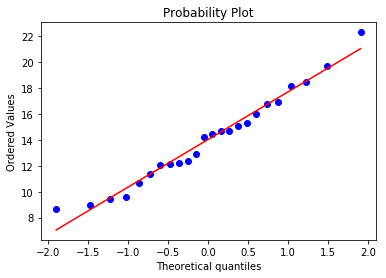

In [10]:
# 绘制 Congruent列的Q-Q plot
stats.probplot(df['Congruent'], dist="norm", plot=pylab)
pylab.show()

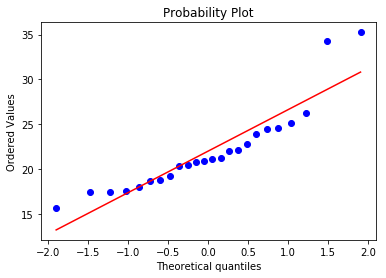

In [11]:
# 绘制 Incongruent列的Q-Q plot
stats.probplot(df['Incongruent'], dist="norm", plot=pylab)
pylab.show()

 - 我需要执行相依样本双尾t检验，因为两个样本来自同一群人，所以一个样本中的值会影响另一个样本中的值，则说明这两个样本是相关的。因从上面两个Q-Q图中可知，两个样本均来自大致服从于正态分布的总体，且总体标准差未知，样本量小于30，故进行T检验。因备择假设是两个总体均值不相等，故进行双尾检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [12]:
# 查看数据集的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [13]:
# 查看数据集的详细信息
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


 - 两组测试组数据量分别为24个，Congruent和Incongruent的平均值分别为14.05和22.02，中位数分别为14.36和21.02，标准差分别为3.56和4.80。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [14]:
# 添加一列对照组之间的差异变化，并查看前5行
df['diff'] = df['Incongruent'] - df['Congruent']
df.head()

,Congruent,Incongruent,diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


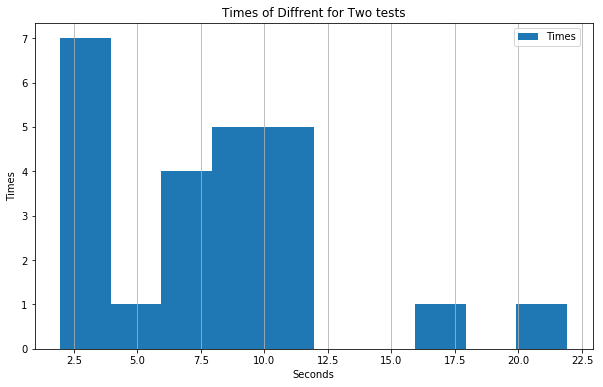

In [15]:
# 分析对照组差异的数据的集中趋势变化
df['diff'].plot(kind='hist',figsize=(10,6),label='Times');

plt.title('Times of Diffrent for Two tests')
plt.xlabel('Seconds')
plt.ylabel('Times')

plt.legend(bbox_to_anchor=[0.85, 1], loc = 'upper left')
plt.grid(axis = 'x')
plt.show();

 - 从以上直方图中可得出，所有参与者的测试差异时间主要集中在2s~4s之间和8s~12s之间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [16]:
# 计算两个时间差异的平均值
diff_mean = df['diff'].mean()
diff_mean

7.964791666666667

In [17]:
# 计算两个时间差异的样本量和自由度
diff_count = df['diff'].count()
diff_DF = diff_count - 1
diff_DF

23

In [18]:
# 计算两个时间差异的标准偏差
diff_Sd_squa = 0
for i in df['diff']:
    diff_Sd_squa += (((i-diff_mean) ** 2)/diff_DF)
diff_Sd = diff_Sd_squa ** 0.5
diff_Sd

4.864826910359055

In [19]:
# 计算两个时间差异的t统计量
diff_t = (diff_mean - 0)/(diff_Sd/(diff_count ** 0.5))
diff_t

8.020706944109959

In [20]:
# 计算t的临界值
-stats.t.ppf((1 + 0.95) / 2., diff_DF),stats.t.ppf((1 + 0.95) / 2., diff_DF)

(-2.0686576104190406, 2.0686576104190406)

 - 因为t统计量在t临界值范围以外，故拒绝原假设。在一致文字条件和不一致文字条件的前提下，每位参与者说出墨色名称的时间不一致。

 - 此结果与我的期望一致。

In [21]:
# 计算效应量衡量指标Cohen's d
Cohens_d = (diff_mean - 0)/diff_Sd
Cohens_d

1.6372199491222628

 - 样本均值与总体均值之间存在1.64个标准偏差。

In [22]:
# 根据t统计量，计算显著性水平5%的均值置信区间
diff_mean - stats.t.ppf((1 + 0.95) / 2., diff_DF) * (diff_Sd/(diff_count**0.5)), \
diff_mean + stats.t.ppf((1 + 0.95) / 2., diff_DF) * (diff_Sd/(diff_count**0.5))

(5.9105554239684235, 10.01902790936491)

 - 与一致文字条件相比，不一致文字条件的前提时，每位参与者说出墨色名称的时间要多大约5.9s到10.0s。

In [23]:
# 根据t统计量，计算p值
stats.t.sf(diff_t, diff_DF) * 2

4.1030005857111556e-08

 - 因P值小于5%，故拒绝原假设。在一致文字条件和不一致文字条件的前提下，每位参与者说出墨色名称的时间不一致。
 
 - 此结果与我的期望一致。